## Import Python Modules

In [121]:
%cd /Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer
%load_ext rpy2.ipython
import pandas as pd
import numpy as np
import glob
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as sk

/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer
The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Define Input and Output Files

In [71]:
# Define infile and outfile
infile = "./rawdata/tfspace.txt"
outfile 

'/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer/rawdata/TCGA-OV-fpkm-uq_chea.txt'

### Test the code

In [87]:
df_tf_na = df_tf.fillna(value = 1)

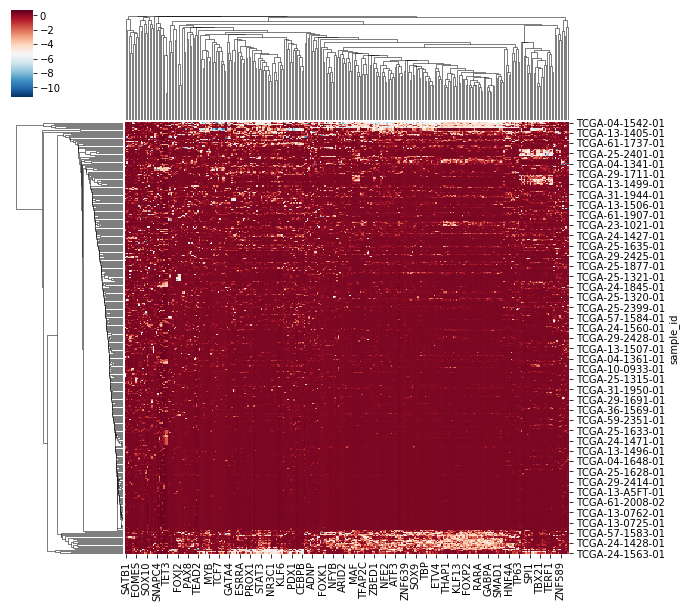

In [157]:
# making clustermap of tf data

# df_tf = pd.read_table(infile).set_index("sample_id")

df_tf = pd.read_table(infile)

# fig, ax = plt.subplots(figsize=(20,10))
sns.clustermap(np.log10(df_tf_na+1), z_score=1, cmap="RdBu_r")


plt.show()    


In [139]:
df_tf_na = df_tf_na.T

In [ ]:
# iris = load_iris()
# X = iris.data
# y = iris.target

# n_components = 2
# ipca = IncrementalPCA(n_components=n_components, batch_size=10)
# X_ipca = ipca.fit_transform(X)

# pca = PCA(n_components=n_components)
# X_pca = pca.fit_transform(X)

# colors = ['navy', 'turquoise', 'darkorange']

# for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
#     plt.figure(figsize=(8, 8))
#     for color, i, target_name in zip(colors, [0, 1, 2], iris.target_names):
#         plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1],
#                     color=color, lw=2, label=target_name)

#     if "Incremental" in title:
#         err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
#         plt.title(title + " of iris dataset\nMean absolute unsigned error "
#                   "%.6f" % err)
#     else:
#         plt.title(title + " of iris dataset")
#     plt.legend(loc="best", shadow=False, scatterpoints=1)
#     plt.axis([-4, 4, -1.5, 1.5])

# plt.show()


In [ ]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])

# finalDf = pd.concat([principalDf, df[['target']]], axis = 1)


from sklearn.decomposition import PCA
pca_plot = PCA(n_components=2)
principalComponents = pca.fit_transform(df_tf_na)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])



In [127]:
df_tf_na.to_csv("./rawdata/df_tf_na.txt", sep = '\t')

In [133]:
from sklearn.decomposition import PCA as pc
pca = pc(n_components=2)
pca.fit(df_tf_na)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [158]:
df_tf_na

,ADNP,AHR,AR,ARID2,ARID3A,ARNT,ARNTL,ASCL1,ATF1,ATF2,...,ZNF589,ZNF592,ZNF639,ZNF644,ZNF740,ZNF750,ZNF766,ZNF83,ZNF92,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,0.999848,0.999571,0.999990,1.000000,1.000000,0.999990,0.999990,0.999960,1.000000,0.999861,...,0.999956,0.994858,0.999848,1.000000,0.998730,1.000000,0.999977,1.000000,0.999990,0.958938
TCGA-04-1332-01,0.953173,0.955610,0.986745,0.997115,0.997115,0.926679,0.999571,0.926679,0.997061,0.993543,...,0.999956,0.994858,1.000000,0.999998,0.973335,0.997115,0.999997,0.999956,0.993200,0.891196
TCGA-04-1338-01,1.000000,0.999571,0.955610,1.000000,1.000000,0.999990,0.993543,0.999861,1.000000,0.998828,...,0.996892,0.806201,0.999533,0.997115,0.999533,0.998828,0.998067,0.999989,0.999990,0.958938
TCGA-04-1341-01,0.973335,0.997115,0.999960,0.766586,0.926679,0.766586,0.515307,0.886073,0.764568,0.766586,...,0.996892,0.981787,0.953173,0.926679,0.680054,0.974851,0.986213,0.826034,0.418730,0.779231
TCGA-04-1343-01,0.680054,0.974851,0.998828,0.604383,0.426694,0.515307,0.999571,0.515307,0.687142,0.955610,...,0.758447,0.690290,0.332752,0.832659,0.680054,0.689486,0.970034,0.985872,0.335242,0.958938
TCGA-04-1347-01,0.998730,1.000000,0.999990,0.999861,0.993543,0.997115,0.999571,0.986745,0.999562,0.998828,...,0.999848,0.999026,0.999848,0.974851,0.999956,0.999960,0.999870,0.998730,0.998755,0.958938
TCGA-04-1350-01,0.999956,0.999990,0.997115,0.997115,0.999960,0.999861,0.999990,0.998828,0.999960,0.974851,...,1.000000,0.994858,0.999848,0.999861,0.999989,1.000000,0.999440,0.999956,0.998755,0.958938
TCGA-04-1356-01,0.999998,0.999998,0.997115,0.993543,0.926679,0.997115,0.832659,0.997115,0.998804,0.999960,...,0.999956,0.806201,0.953173,0.998828,0.998730,0.999571,0.994431,0.999956,0.999958,0.998641
TCGA-04-1357-01,0.993082,0.999571,0.999571,0.999990,0.999960,0.999998,0.999990,1.000000,0.999562,0.604383,...,0.996892,0.981787,0.999998,0.999861,0.993082,1.000000,0.986213,0.999533,0.986095,0.632035


In [147]:
# following steps from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

from sklearn.preprocessing import StandardScaler
tfs = list(df_tf_na.columns.values)

# separating out the tfs
x = df_tf_na.loc[:, tfs].values

# separating out the samples
y = df_tf_na.index.values



# standardizing the features
x = StandardScaler().fit_transform(x)

In [149]:
# still following link above

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents, columns = ["principal component 1", "principal component 2"])

In [163]:
# still following link

# finalDf= pd.concat([principalDf, df_tf_na.index.values], axis = 1)
finalDf = principalDf
finalDf["sample_id"] = df_tf_na.index

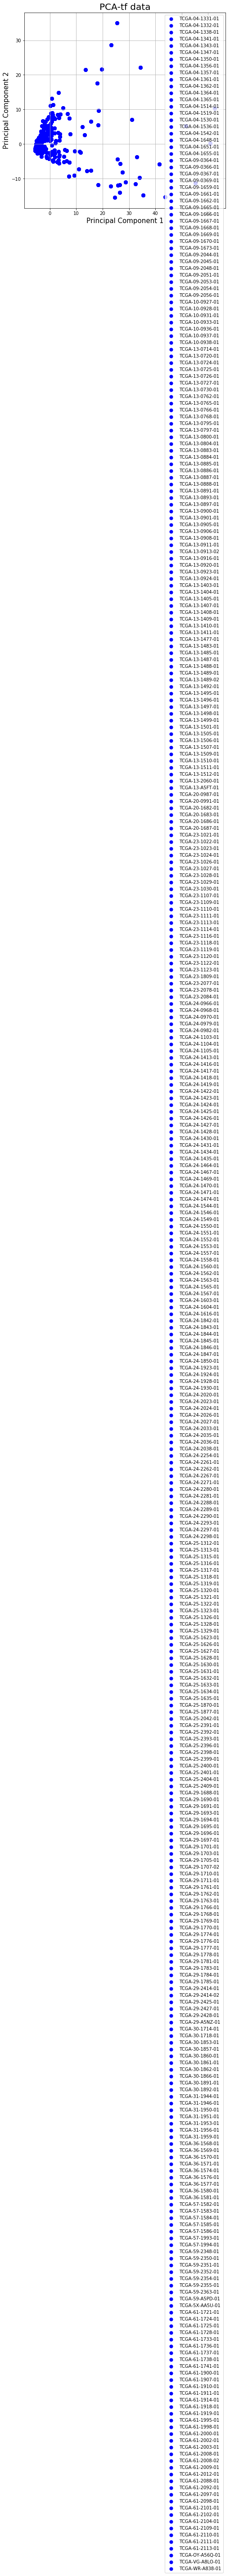

In [183]:
# still following link

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA-tf data', fontsize = 20)
samples = list(df_tf_na.index.values)
# colors = ['r', 'g', 'b']
# for target, color in zip(samples,colors):
for sample in zip(samples):
    indicesToKeep = finalDf['sample_id'] == samples
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(samples)
ax.grid()

In [172]:
# repeating PCA on expression data

exp_infile = ("./rawdata/TCGA-OV-fpkm-uq_zscore.txt")
exp_df = pd.read_table(exp_infile).set_index("gene_symbol")

In [177]:
exp_df.head()

gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,3.453510,1.977759,-0.154518,-0.202513,-0.786031,0.389903,-0.039120,-0.131772,0.813521,-0.577149,...,1.554440,-0.574994,-0.198958,-0.463046,1.757854,-0.195315,2.954103,-0.915798,-0.281090,0.067628
TCGA-04-1332-01,-0.134547,-0.404266,-0.221775,0.857041,-0.080410,0.099903,-0.377877,0.008313,0.524188,0.270056,...,-0.767706,0.606222,-0.189829,-0.330970,-0.525205,-0.242669,-0.746013,-0.095896,1.746285,-1.397011
TCGA-04-1338-01,0.867967,0.049503,0.002566,-0.413354,-0.664682,0.280103,1.336759,-0.030077,-0.029438,-0.223477,...,-0.303856,-0.872712,-0.661406,-0.619870,-0.430781,-0.130569,0.538036,1.416110,-0.233230,-1.172972
TCGA-04-1341-01,0.012802,-0.145450,-0.012125,-0.896349,-0.404915,-0.291065,-0.281471,-0.052221,2.713774,-0.505033,...,0.702668,-0.678048,-0.424513,-0.458474,-0.459866,-0.108431,-1.721896,2.349223,0.098726,-1.636894
TCGA-04-1343-01,2.528017,1.897298,-0.035803,-0.305846,-0.434804,-0.363767,-0.319922,-0.043796,-0.101398,2.086093,...,-1.088982,-1.118753,-1.275916,0.733057,1.918641,-0.109847,-0.172244,1.693168,2.740753,-0.948225


In [174]:
exp_df = exp_df.T

In [176]:
exp_df.index.name = "sample_id"

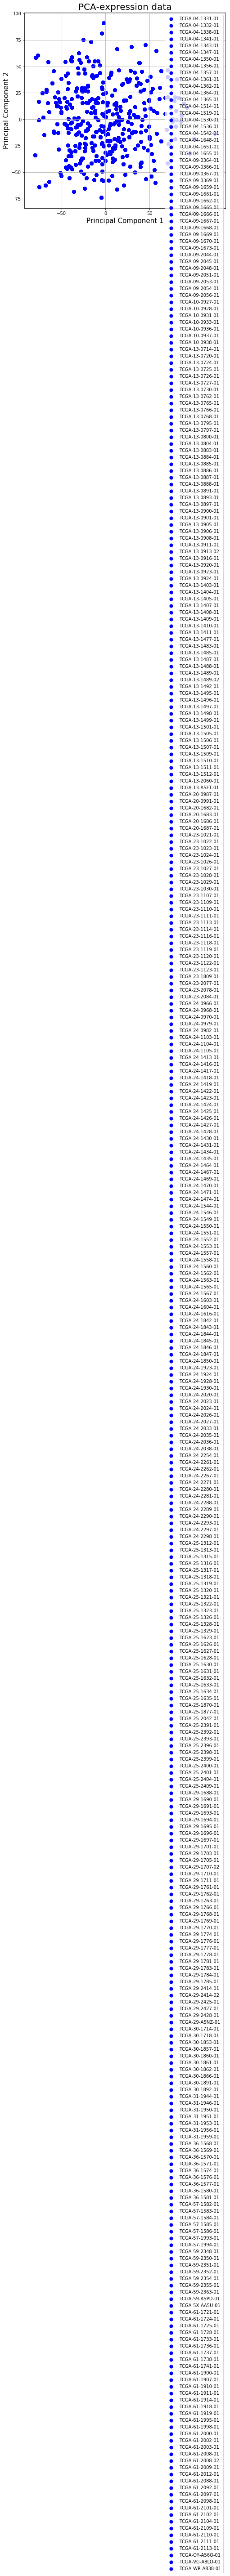

In [182]:
# following steps from https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
# pca2 for expression data

genes = list(exp_df.columns.values)

# separating out the tfs
x2 = exp_df.loc[:, genes].values

# separating out the samples
y2 = exp_df.index.values

# standardizing the features
x2 = StandardScaler().fit_transform(x2)


# still following link above

pca2 = PCA(n_components=2)
principalComponents2 = pca2.fit_transform(x2)
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ["principal component 1", "principal component 2"])

# still following link

# finalDf= pd.concat([principalDf, df_tf_na.index.values], axis = 1)
finalDf2 = principalDf2
finalDf2["sample_id"] = exp_df.index


# still following link

fig2 = plt.figure(figsize = (8,8))
ax = fig2.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('PCA-expression data', fontsize = 20)
samples2 = list(exp_df.index.values)
# colors = ['r', 'g', 'b']
# for target, color in zip(samples2,colors):
for sample in zip(samples2):
    indicesToKeep = finalDf2['sample_id'] == samples2
    ax.scatter(finalDf2.loc[indicesToKeep, 'principal component 1']
               , finalDf2.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(samples2)
ax.grid()

In [198]:
df_tf_na_2 = df_tf_na_2.T

In [199]:
df_tf_na_2.head()

sample_id,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1350-01,TCGA-04-1356-01,TCGA-04-1357-01,TCGA-04-1361-01,...,TCGA-61-2101-01,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
ADNP,0.999848,0.953173,1.000000,0.973335,0.680054,0.998730,0.999956,0.999998,0.993082,0.680054,...,0.999848,0.826034,0.973335,0.999956,1.000000,0.999956,0.985872,0.923040,0.99873,0.999533
AHR,0.999571,0.955610,0.999571,0.997115,0.974851,1.000000,0.999990,0.999998,0.999571,0.993543,...,0.999990,0.999960,0.986745,0.926679,0.955610,0.426694,0.997115,0.999990,0.99996,0.997115
AR,0.999990,0.986745,0.955610,0.999960,0.998828,0.999990,0.997115,0.997115,0.999571,0.998828,...,0.999998,0.998828,0.974851,0.986745,0.999861,0.997115,0.993543,0.999960,1.00000,1.000000
ARID2,1.000000,0.997115,1.000000,0.766586,0.604383,0.999861,0.997115,0.993543,0.999990,0.999998,...,1.000000,0.955610,0.986745,0.999998,0.999960,0.999990,0.998828,0.997115,1.00000,1.000000
ARID3A,1.000000,0.997115,1.000000,0.926679,0.426694,0.993543,0.999960,0.926679,0.999960,0.999998,...,0.999998,0.926679,0.886073,0.999990,0.999998,0.999861,0.997115,0.999861,1.00000,0.999960


In [200]:
df_forclustergram = np.log10(df_tf_na_2 + 1)

In [202]:
df_forclustergram.to_csv("./rawdata/df_tf_na_log3.txt", sep = '\t')

In [213]:
exp_df.head()

gene_symbol,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2ML1-AS2,A2MP1,A3GALT2,...,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11AP1,ZYG11B,ZYX,ZZEF1,ZZZ3
sample_id,,,,,,,,,,,,,,,,,,,,,
TCGA-04-1331-01,3.453510,1.977759,-0.154518,-0.202513,-0.786031,0.389903,-0.039120,-0.131772,0.813521,-0.577149,...,1.554440,-0.574994,-0.198958,-0.463046,1.757854,-0.195315,2.954103,-0.915798,-0.281090,0.067628
TCGA-04-1332-01,-0.134547,-0.404266,-0.221775,0.857041,-0.080410,0.099903,-0.377877,0.008313,0.524188,0.270056,...,-0.767706,0.606222,-0.189829,-0.330970,-0.525205,-0.242669,-0.746013,-0.095896,1.746285,-1.397011
TCGA-04-1338-01,0.867967,0.049503,0.002566,-0.413354,-0.664682,0.280103,1.336759,-0.030077,-0.029438,-0.223477,...,-0.303856,-0.872712,-0.661406,-0.619870,-0.430781,-0.130569,0.538036,1.416110,-0.233230,-1.172972
TCGA-04-1341-01,0.012802,-0.145450,-0.012125,-0.896349,-0.404915,-0.291065,-0.281471,-0.052221,2.713774,-0.505033,...,0.702668,-0.678048,-0.424513,-0.458474,-0.459866,-0.108431,-1.721896,2.349223,0.098726,-1.636894
TCGA-04-1343-01,2.528017,1.897298,-0.035803,-0.305846,-0.434804,-0.363767,-0.319922,-0.043796,-0.101398,2.086093,...,-1.088982,-1.118753,-1.275916,0.733057,1.918641,-0.109847,-0.172244,1.693168,2.740753,-0.948225


In [221]:
exp_df2 = pd.read_table(exp_infile).set_index("gene_symbol")

### 1-calculate variance for each gene and make into df
## making heatmap from TCGA expression data--before zscores

# first, calculating variance across rows for each gene--only using top 500-2000 genes in the heatmap

expression_variance = []
expression_variance = exp_df.var(axis=0)

df_expression_variance = pd.DataFrame(expression_variance)

In [231]:
# 2-sort the values in variance column
df_expression_variance_sorted2 = df_expression_variance[0].sort_values(ascending = False)

# 3-make the sorted values into df
df_expression_variance_sorted3 = pd.DataFrame(df_expression_variance_sorted2)

# 4-take the top 1000 values
df_expression_variance_sorted3_top1000 = df_expression_variance_sorted3[:1000]

# 5-merge to get expression for each patient of top 1000 genes with most variance
df_expression_variance_3_top1000 = pd.merge(df_expression_variance_sorted3_top1000, exp_df.T, how='inner', on=["gene_symbol"])

# 6-transform df
df_expression_variance_3_top1000 = df_expression_variance_3_top1000.T

# 7-drop row of variance
df_expression_variance_3_top1000 = df_expression_variance_3_top1000[1:1001]

# 8-transform
df_expression_variance_3_top1000 = df_expression_variance_3_top1000.T


In [232]:
df_expression_variance_3_top1000.head()

,TCGA-04-1331-01,TCGA-04-1332-01,TCGA-04-1338-01,TCGA-04-1341-01,TCGA-04-1343-01,TCGA-04-1347-01,TCGA-04-1350-01,TCGA-04-1356-01,TCGA-04-1357-01,TCGA-04-1361-01,...,TCGA-61-2101-01,TCGA-61-2102-01,TCGA-61-2104-01,TCGA-61-2109-01,TCGA-61-2110-01,TCGA-61-2111-01,TCGA-61-2113-01,TCGA-OY-A56Q-01,TCGA-VG-A8LO-01,TCGA-WR-A838-01
gene_symbol,,,,,,,,,,,,,,,,,,,,,
MIR5702,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
TCEB1P14,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
RNA5SP27,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
SDR42E1P1,-0.131056,-0.198571,-0.079015,-0.051995,-0.041333,-0.138975,-0.075134,-0.072218,-0.020719,-0.079488,...,0.029969,-0.109099,0.008397,-0.088261,-0.100938,-0.066152,0.008994,-0.132812,-0.164174,-0.195793
GCG,-0.152579,-0.213341,-0.096282,-0.070897,-0.064280,-0.154097,-0.093395,-0.094404,-0.042500,-0.103954,...,0.008098,-0.123484,-0.018947,-0.111255,-0.119031,-0.084767,-0.017661,-0.149593,-0.183471,-0.211160


In [238]:
df_expression_variance_3_top1000_log = np.log10(df_expression_variance_3_top1000 + 1)



/Users/maayanlab/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log10
  """Entry point for launching an IPython kernel.


ValueError: The condensed distance matrix must contain only finite values.

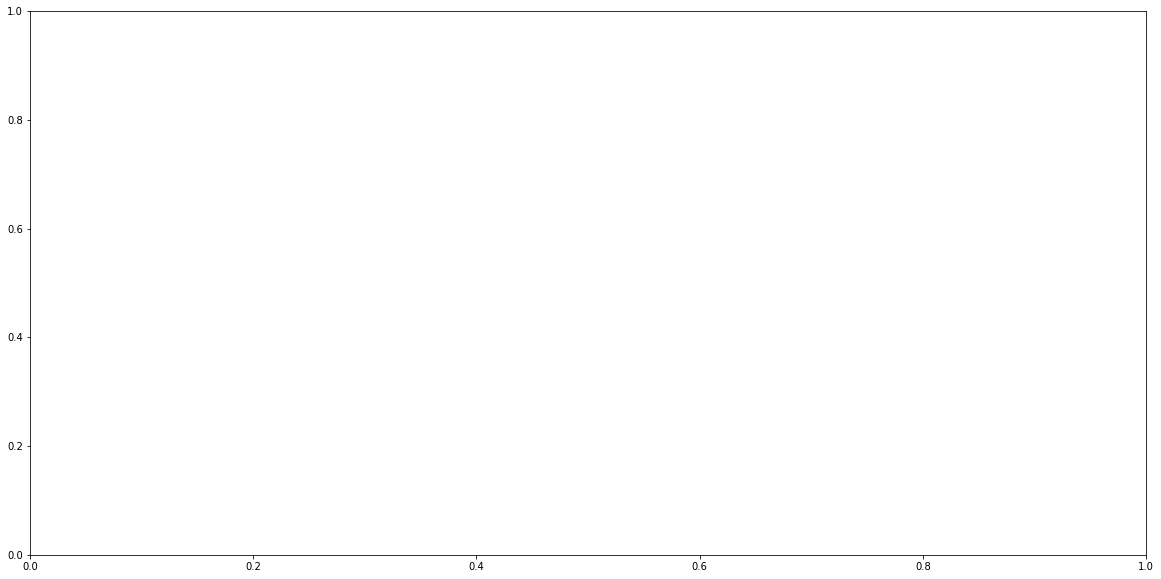

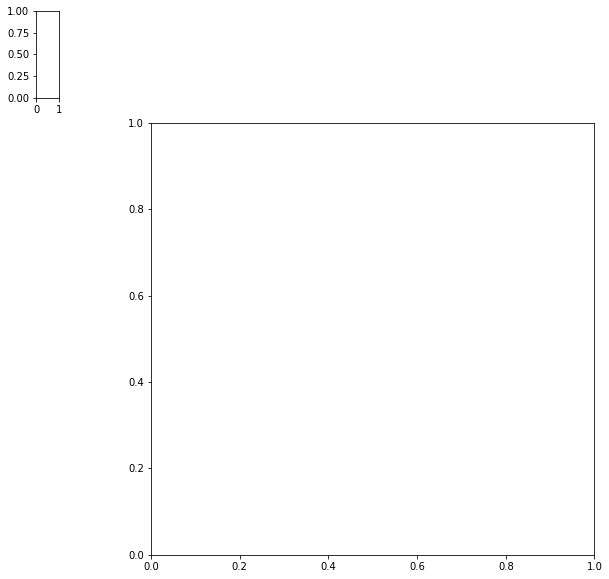

In [237]:

fig, ax = plt.subplots(figsize=(20,10))
sns.clustermap(df_expression_variance_3_top1000_log)


plt.show()

In [239]:
df_expression_variance_3_top1000_log.to_csv("./rawdata/expression_forclustergrammer.txt", sep = "\t")

In [266]:
from sklearn.manifold import TSNE
import plotly.graph_objs as go
from plotly.offline import iplot
import scipy.stats as ss
import warnings
from IPython.display import display, Markdown
%cd /Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer
from tsne import *


/Users/maayanlab/Documents/Ovarian Cancer Project/ovarian-cancer


In [267]:
tsne_results = run(df_tf_na)

KeyError: 'logCPM'

In [263]:
# Plot t-SNE results
plot(tsne_results)

NameError: name 'tsne_results' is not defined

In [268]:
tf_tsne = TSNE(n_components=2).fit_transform(df_tf_na)

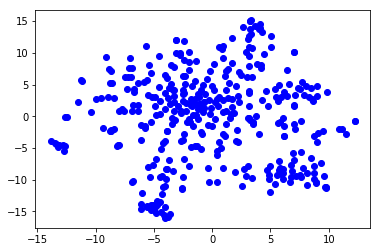

In [283]:
Y = tf_tsne
plt.scatter(Y[:, 0], Y[:,1], c=color, cmap=plt.cm.Spectral)
plt.show()

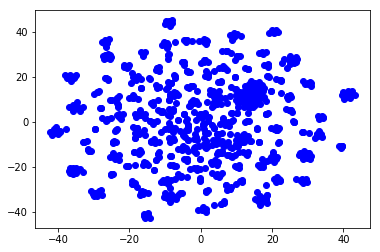

In [280]:
exp_tsne = TSNE(n_components=2).fit_transform(df_expression_variance_3_top1000)
Y2 = exp_tsne
plt.scatter(Y2[:, 0], Y2[:,1], c=color, cmap=plt.cm.Spectral)
plt.show()

## testing code for counting drugs/drug analysis

In [469]:
infile_alonedrugs = "./rawdata/TCGA-OV-fpkm-uq_L1000_drugsig_sigids_merged.txt"
infile_topotecan = "./rawdata/combinationdrugs.dir/topotecan_df_foranalysis.txt"
infile_tamoxifen = "./rawdata/combinationdrugs.dir/tamoxifen_df_foranalysis.txt"

In [ ]:
## find and compare top 25 drugs predicted as pairs and alone--solely on counts?
dict_pertcounts = {}
for item in list_pertid:
    count = 0
    for item2 in list_pertid:
        if item == item2:
            count += 1
        dict_pertcounts[item] = count
        

In [490]:
## find and compare top 25 drugs predicted as pairs and alone--solely on counts?

# read alone drugs df
df_alonedrugs = pd.read_table(infile_alonedrugs).set_index("sig_id")

# merge drug pair dataframes
df_topotecan = pd.read_table(infile_topotecan).set_index("sig_id")
df_tamoxifen = pd.read_table(infile_tamoxifen).set_index("sig_id")

df_pairmerged = pd.concat([df_topotecan, df_tamoxifen], axis=0)

# count alone drugs
list_alone_pertdesc = (df_alonedrugs["pert_desc"]).tolist()

dict_alone_pertcounts = {}
for item in list_alone_pertdesc:
    count = 0
    for item2 in list_alone_pertdesc:
        if item == item2:
            count += 1
        dict_alone_pertcounts[item] = count

        


In [590]:
alone_counts_keys = list(dict_alone_pertcounts.keys())
alone_counts_values = list(dict_alone_pertcounts.values())
df_alone_counts = pd.DataFrame()
df_alone_counts["drugs"] = alone_counts_keys
df_alone_counts["counts"] = alone_counts_values
# df_alone_counts.set_index("drugs")
df_alone_counts = df_alone_counts.sort_values(by="counts", axis=0, ascending=False)

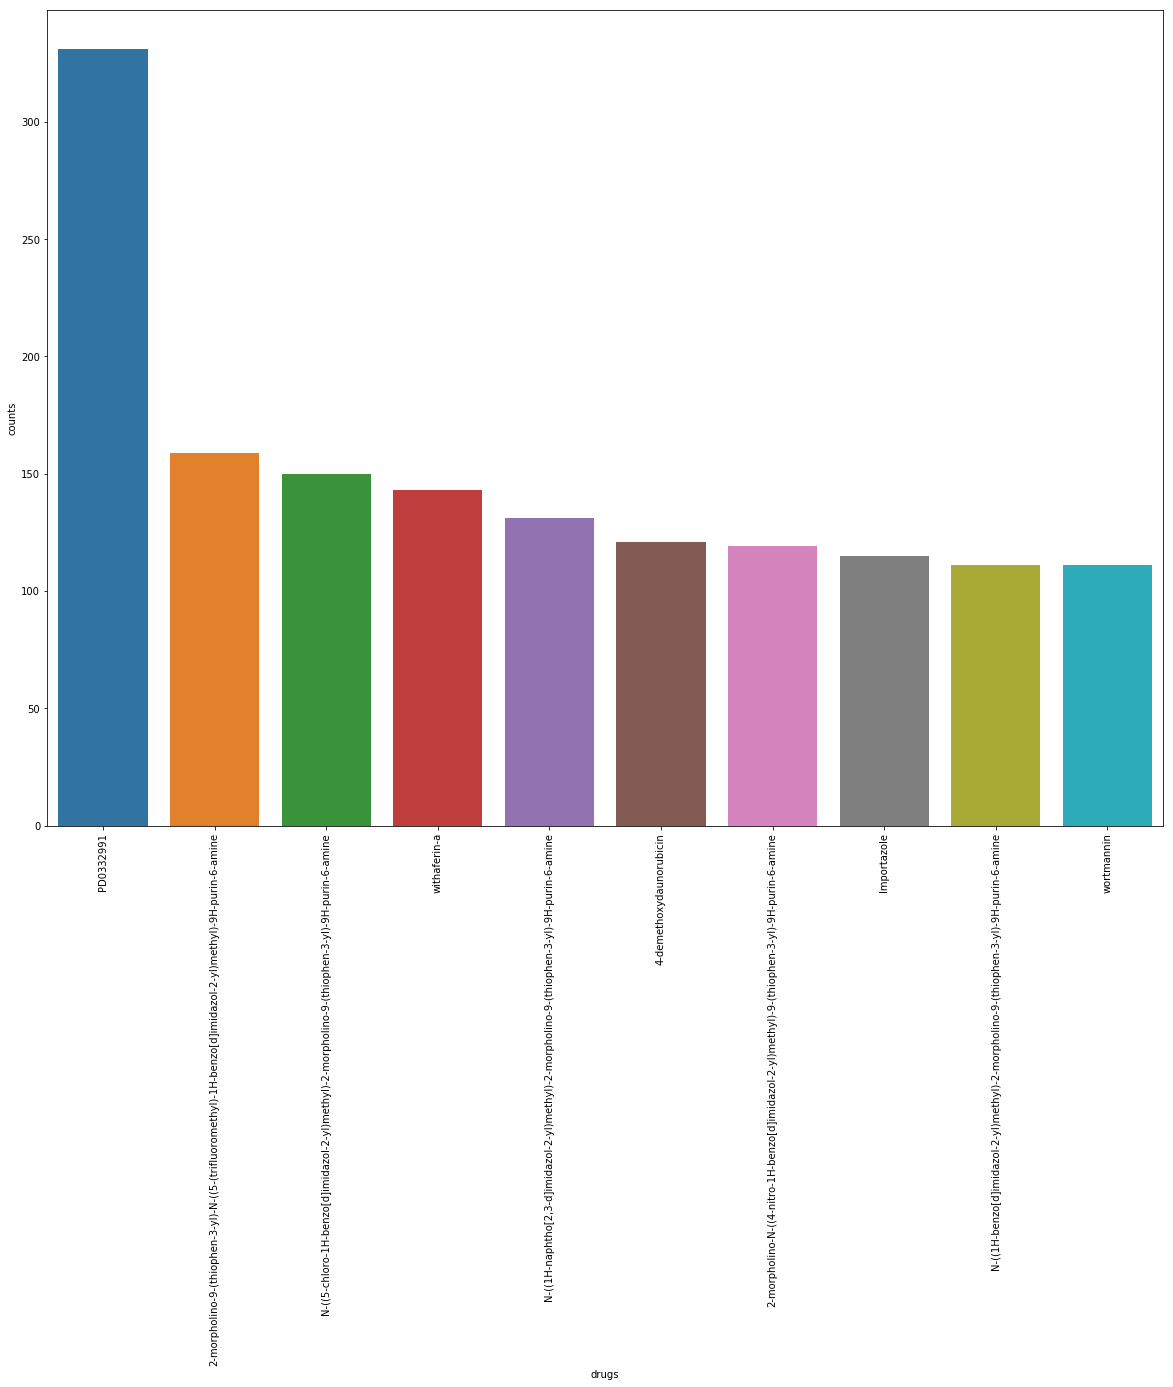

In [786]:
## plotting alone drugs
df_alone_counts_dropped = df_alone_counts.drop(labels = [11, 0])
df_alone_counts_dropped.head()

df_alone_counts_dropped_25 = df_alone_counts_dropped[0:10]
f, ax = plt.subplots(figsize=(20, 15))
fig_alone = sns.barplot("drugs", y="counts", data = df_alone_counts_dropped_25) ## remove -666 and 89671
plt.xticks(rotation=90)
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'plot2'

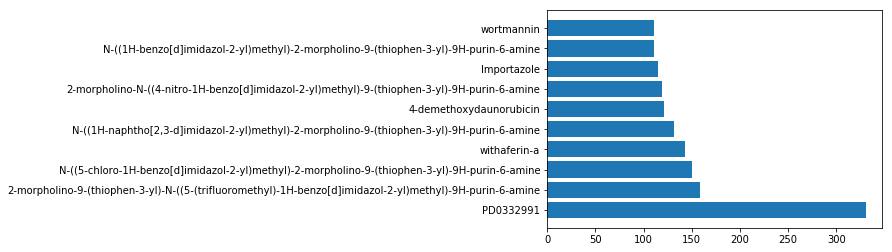

In [791]:
y_pos = np.arange(len(df_alone_counts_dropped_25["drugs"]))              
plt.barh(y_pos, df_alone_counts_dropped_25["counts"])
plt.yticks(y_pos, df_alone_counts_dropped_25["drugs"])

plt.show()

In [654]:
## making dataframe to pair alone top 25 with counts in paired drug data

df_alone_counts_dropped_25 = df_alone_counts_dropped_25.rename(columns = {"drugs" : "pert_desc"})

df_alone_top25 = df_alone_counts_dropped_25.merge(res2, how="inner", on="pert_desc")

df_alone_top25 = df_alone_top25.rename(columns = {"counts_x" : "counts_alone", "counts_y" : "counts_paired"})

df_alone_top25_alone = df_alone_top25.drop("counts_paired", axis=1).rename(columns = {"counts_alone" : "counts"})

df_alone_top25_alone["type"] = "alone"

df_alone_top25_paired = df_alone_top25.drop("counts_alone", axis=1).rename(columns = {"counts_paired" : "counts"})

df_alone_top25_paired["type"] = "paired"

df_alone_top25_final = pd.concat([df_alone_top25_paired, df_alone_top25_alone])

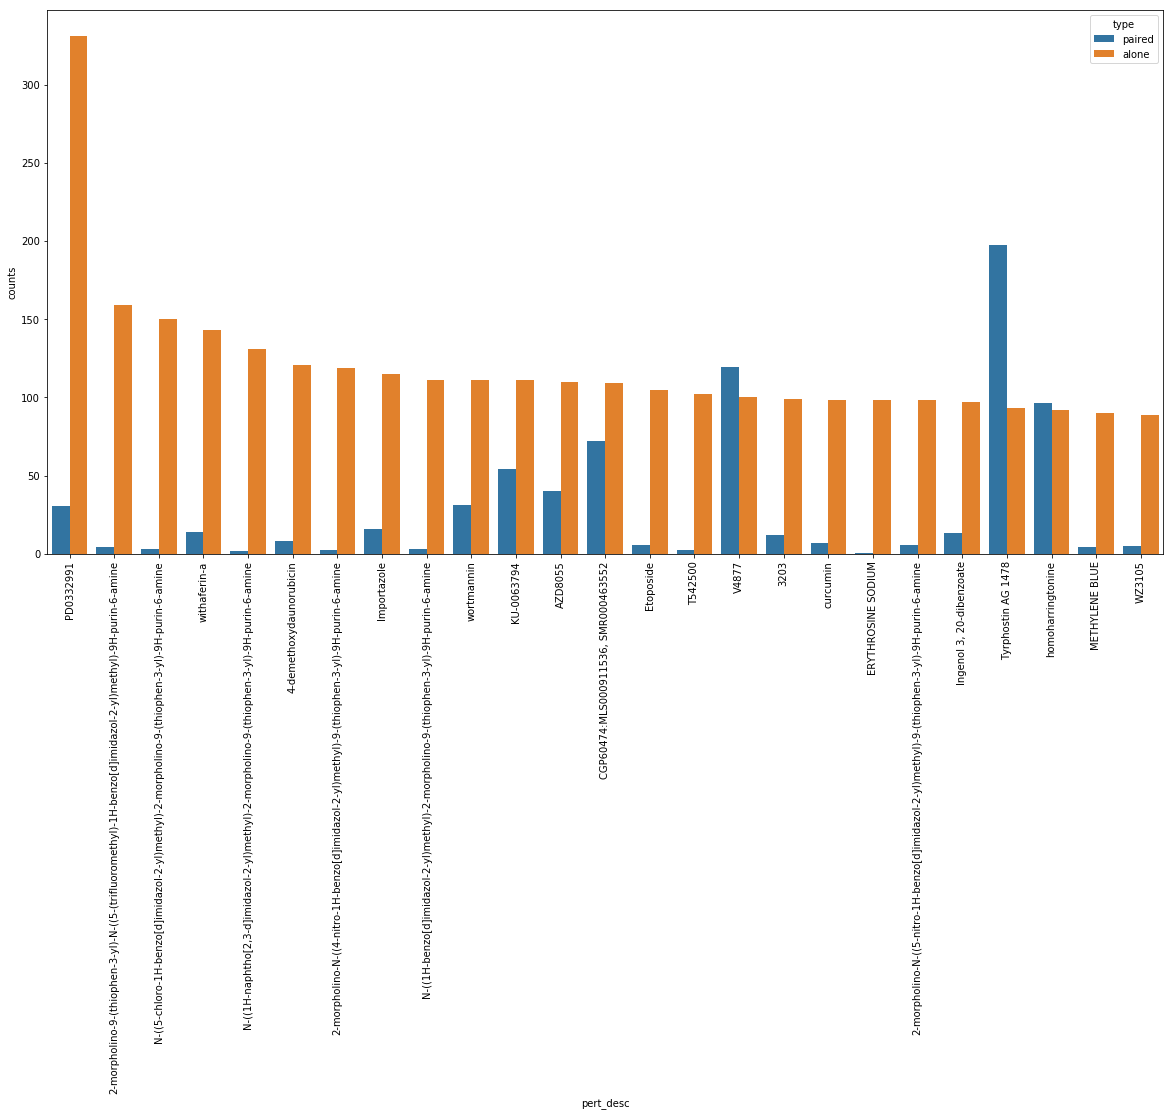

In [668]:

f, ax = plt.subplots(figsize=(20, 10))
fig_alone = sns.barplot("pert_desc", y="counts", hue = "type", data = df_alone_top25_final) ## remove -666 and 89671
plt.xticks(rotation=90)
plt.show()

In [493]:
infiles = glob.glob('rawdata/combinationdrugs.dir/*_foranalysis.txt')

In [496]:
import os

In [499]:
results = []
for infile in infiles:
    drug_df = pd.read_table(infile, index_col='sig_id')
    drug_name = os.path.basename(infile).split('_')[0]
    drug_df['drug'] = drug_name
    results.append(drug_df)
drug_concat = pd.concat(results)
drug_concat.head()

,pert_desc,pert_dose,pert_id,pert_time,combined_scores,pvals,qvals,scores,zscores,sample,drug
sig_id,,,,,,,,,,,
CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,89671,0.09,BRD-A31107743,24,4.833509,0.000994,1.0,0.049834,-1.609650,TCGA-04-1331-01,gemcitabine
CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,89671,0.09,BRD-A31107743,24,1.255199,0.166007,1.0,0.028391,-1.609493,TCGA-04-1361-01,gemcitabine
CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,89671,0.09,BRD-A31107743,24,1.020265,0.231412,1.0,0.026012,-1.605162,TCGA-04-1362-01,gemcitabine
CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,89671,0.09,BRD-A31107743,24,1.263414,0.163923,1.0,0.028481,-1.608705,TCGA-04-1365-01,gemcitabine
CPC006_A375_24H:BRD-A31107743-001-01-3:0.09,89671,0.09,BRD-A31107743,24,1.577017,0.104767,1.0,0.032787,-1.609571,TCGA-04-1530-01,gemcitabine


In [505]:
res = drug_concat.groupby(['drug', 'pert_desc']).size().rename('counts').to_frame()
res.head()

counts
drug      pert_desc                                                 
cisplatin (+/-)-norepinephrine                                    14
          (-)-Terreic acid                                         4
          (-)-cotinine                                             1
          (3,4-dihydroisoquinolin-2(1H)-yl)(4-(hydroxydip...       3
          (4-([1,1'-biphenyl]-4-yl)-1H-1,2,3-triazol-1-yl...       3

In [652]:
res2 = drug_concat.groupby("pert_desc").size().rename("counts").to_frame()
res2.sort_values(by="counts", axis=0, ascending=False)

res2["counts2"] = res2["counts"]/12
res2 = res2.drop(labels = "counts", axis=1)
res2 = res2.rename(columns={"counts2" : "counts"})

In [507]:
res_table = res.reset_index().pivot(index='drug', columns='pert_desc', values='counts').fillna(0)
res_table

pert_desc,(+/-)-epinephrine,(+/-)-norepinephrine,(-)-Gallocatechin gallate,(-)-Terreic acid,(-)-cotinine,"(2-ethylpiperidin-1-yl)(4-(hydroxydiphenylmethyl)-1H-1,2,3-triazol-1-yl)methanone","(3,4-dihydroisoquinolin-2(1H)-yl)(4-(hydroxydiphenylmethyl)-1H-1,2,3-triazol-1-yl)methanone","(4-(2,5-di(furan-2-yl)pyrazolo[1,5-a]pyrimidin-7-yl)piperazin-1-yl)(furan-3-yl)methanone KUC106884N","(4-([1,1'-biphenyl]-4-yl)-1H-1,2,3-triazol-1-yl)(pyrrolidin-1-yl)methanone","(4-(hydroxydiphenylmethyl)-1H-1,2,3-triazol-1-yl)(4-(hydroxydiphenylmethyl)piperidin-1-yl)methanone",...,vincristine,vindesine,vinorelbine,vorinostat,westcort,wiskostatin,withaferin-a,wortmannin,zafirlukast,zileuton
drug,,,,,,,,,,,,,,,,,,,,,
cisplatin,0.0,14.0,0.0,4.0,1.0,0.0,3.0,0.0,3.0,0.0,...,8.0,3.0,3.0,52.0,0.0,6.0,11.0,42.0,3.0,1.0
cyclophosphamide,0.0,29.0,0.0,4.0,0.0,1.0,3.0,0.0,0.0,3.0,...,1.0,1.0,1.0,13.0,1.0,2.0,11.0,26.0,4.0,2.0
docetaxel,0.0,32.0,1.0,4.0,0.0,2.0,1.0,0.0,0.0,1.0,...,2.0,1.0,0.0,15.0,0.0,2.0,11.0,30.0,3.0,1.0
doxorubicin,0.0,22.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0,2.0,...,4.0,1.0,5.0,21.0,0.0,5.0,14.0,16.0,4.0,0.0
etoposide,0.0,29.0,0.0,4.0,0.0,2.0,2.0,0.0,0.0,1.0,...,1.0,2.0,1.0,10.0,0.0,2.0,12.0,23.0,5.0,2.0
gemcitabine,0.0,14.0,0.0,4.0,1.0,0.0,3.0,0.0,3.0,0.0,...,8.0,3.0,3.0,52.0,0.0,6.0,11.0,42.0,3.0,1.0
ifosfamide,0.0,29.0,0.0,4.0,0.0,1.0,3.0,0.0,0.0,3.0,...,1.0,1.0,1.0,13.0,1.0,2.0,11.0,26.0,4.0,2.0
irinotecan,0.0,21.0,2.0,5.0,1.0,2.0,4.0,0.0,0.0,3.0,...,2.0,1.0,0.0,16.0,0.0,2.0,17.0,33.0,3.0,0.0
paclitaxel,2.0,5.0,1.0,3.0,2.0,3.0,5.0,0.0,1.0,4.0,...,4.0,0.0,1.0,42.0,1.0,2.0,25.0,67.0,1.0,4.0


In [661]:
## plot of top 25 drugs for the paired drugs and pair this data with counts for these drugs from the alone data

paired_sorted = res2.sort_values(by="counts", axis=0, ascending=False)
paired_sorted_top25 = paired_sorted[2:27]
df_alone_counts_forpairedgraph = df_alone_counts.rename(columns = {"drugs" : "pert_desc"})
paired_top25 = paired_sorted_top25.merge(df_alone_counts_forpairedgraph, how ="inner", on = "pert_desc")
paired_top25 = paired_top25.rename(columns = {"counts_x" : "counts_paired", "counts_y" : "counts_alone"})
paired_top25_paired = paired_top25.drop("counts_alone", axis=1).rename(columns={"counts_paired" : "counts"})
paired_top25_paired["type"] = "paired"
paired_top25_alone = paired_top25.drop("counts_paired", axis=1).rename(columns={"counts_alone" : "counts"})
paired_top25_alone["type"] = "alone"
paired_top25_final = pd.concat([paired_top25_paired, paired_top25_alone])

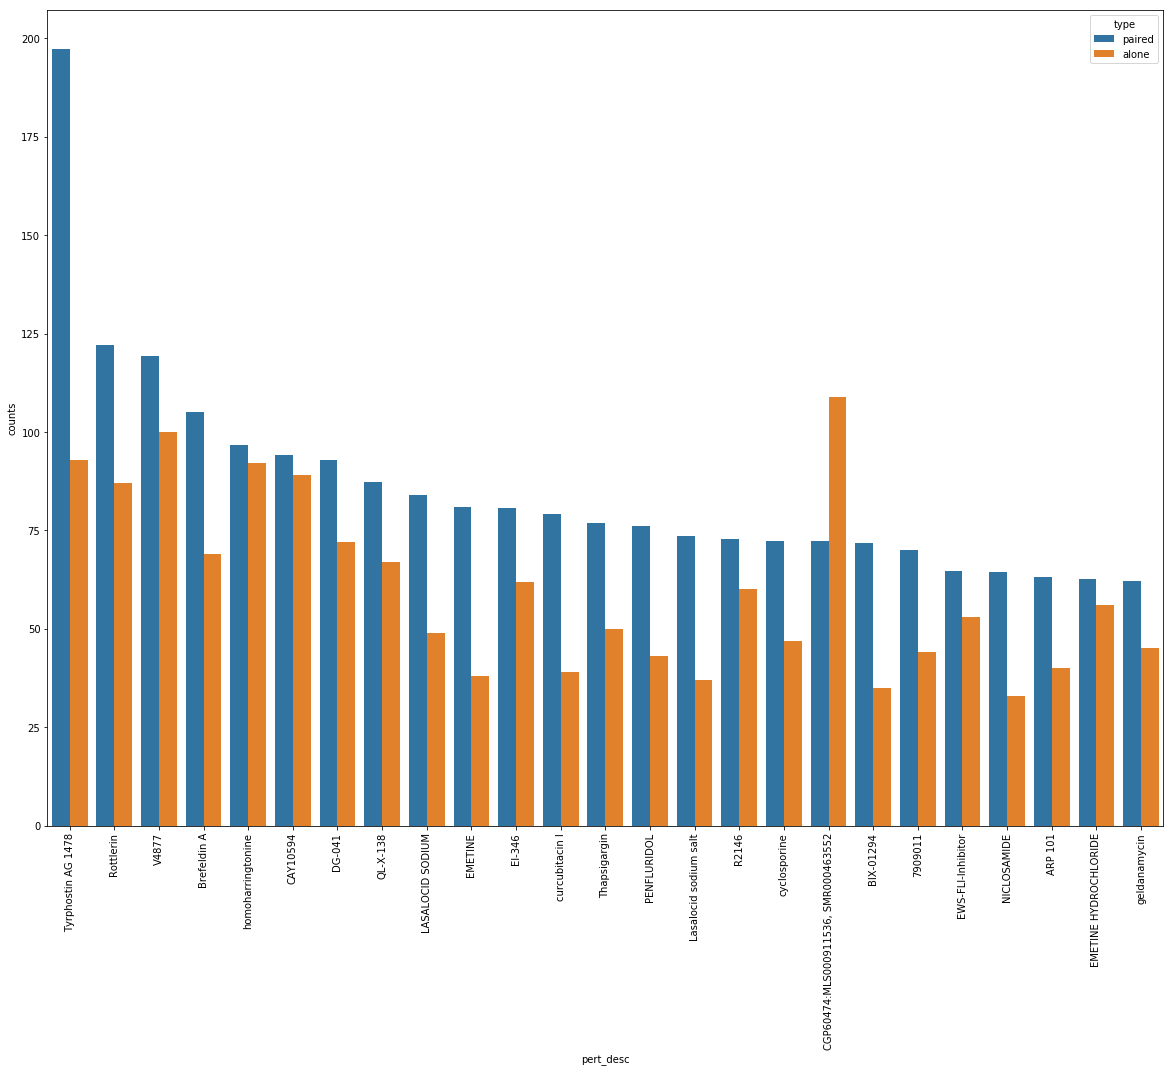

In [663]:
f, ax = plt.subplots(figsize=(20, 15))
fig_alone = sns.barplot("pert_desc", y="counts", hue = "type", data = paired_top25_final) ## remove -666 and 89671
plt.xticks(rotation=90)
plt.show()

In [751]:
# infiles2 = glob.glob('rawdata/combinationdrugs.dir/*_df_correctpertnames_counts_sorted.txt')
for infile in infiles2:
    drug_pair_df_counts = pd.read_table(infile)
    list_counts = drug_pair_df_counts["counts"].tolist()
    list_pertnames = list(drug_pair_df_counts["pert_names"])
    drug_pair_df_counts2 = pd.DataFrame()
    drug_pair_df_counts2["pert_names"] = list_pertnames
    drug_pair_df_counts2["counts"] = list_counts
    drug_pair_df_counts2 = drug_pair_df_counts2.sort_values(by="counts", axis=0, ascending=False)
    drug_pair_df_counts_5 = drug_pair_df_counts2[0:5]
#     drug_name2 = os.path.basename(infile).split('_')[0]
#     f, ax = plt.subplots(figsize=(20, 15))
    fig_pair_drug = sns.barplot(x="pert_names", y="counts", data=drug_pair_df_counts_5, orient="h").set_title(drug_name)
#     plt.xticks(rotation=90)
    plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'int'

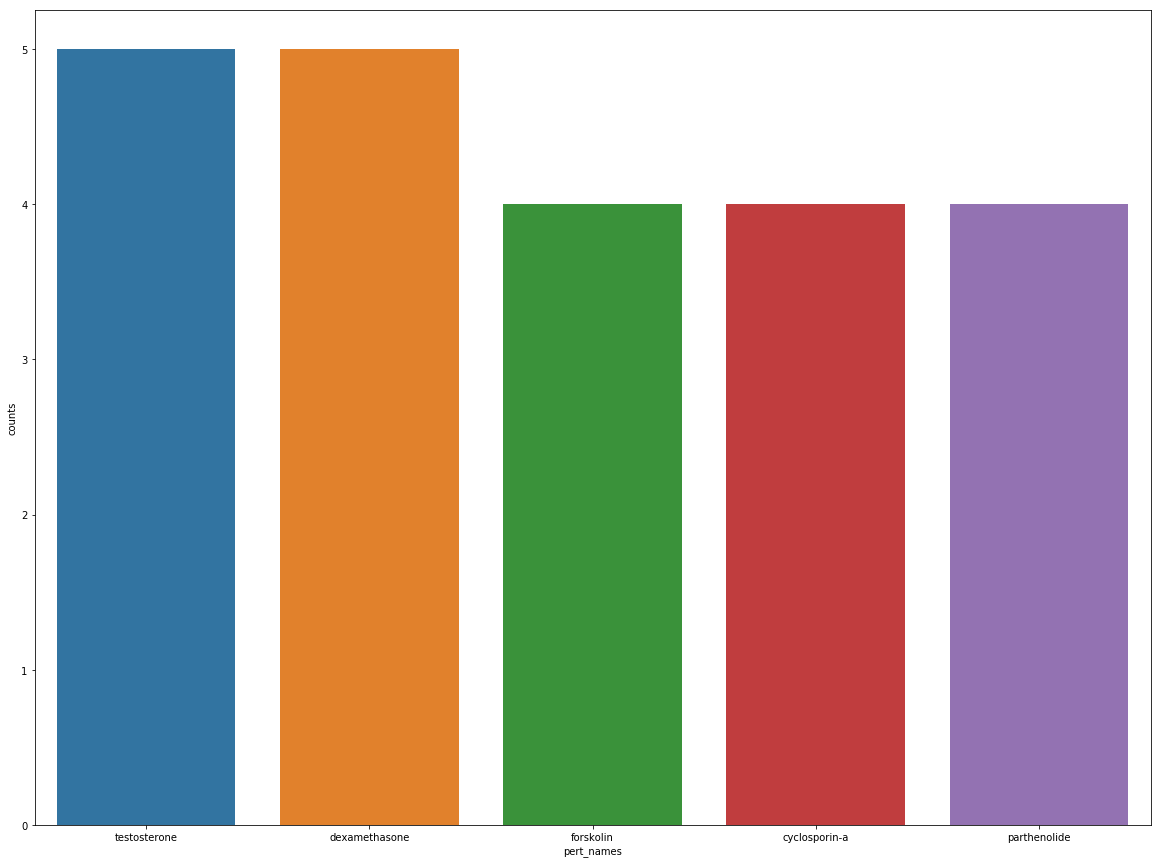

In [769]:
infile3 = "rawdata/combinationdrugs.dir/topotecan_df_correctpertnames_counts_sorted.txt"
drug_pair_df_counts = pd.read_table(infile3)
#     list_counts = drug_pair_df_counts["counts"].tolist()
#     list_pertnames = list(drug_pair_df_counts["pert_names"])
#     drug_pair_df_counts2 = pd.DataFrame()
#     drug_pair_df_counts2["pert_names"] = list_pertnames
#     drug_pair_df_counts2["counts"] = list_counts
drug_pair_df_counts = drug_pair_df_counts.sort_values(by="counts", axis=0, ascending=False)
drug_pair_df_counts_5 = drug_pair_df_counts[0:5]
# #     drug_name2 = os.path.basename(infile).split('_')[0]
f, ax = plt.subplots(figsize=(20, 15))
fig_pair_drug = sns.barplot(x="pert_names", y="counts", data=drug_pair_df_counts_5)
# #     plt.xticks(rotation=90)
plt.show()


In [766]:
drug_pair_df_counts_5

,Unnamed: 0,pert_names,counts
0,79,testosterone,5
1,17,dexamethasone,5
2,202,forskolin,4
3,121,cyclosporin-a,4
4,301,parthenolide,4


In [780]:
# use groupby("pert_name").size()

infile10 = "./rawdata/combinationdrugs.dir/cisplatin_df_correctpertnames_test.txt"
df_test5 = pd.read_table(infile10)
df_test_6 = df_test5.groupby("pert_name").size().rename("counts").to_frame()
df_test_6_sorted = df_test_6.sort_values(by = "counts", axis = 0, ascending=False)

In [783]:
df_test5

,pert_name
0,noretynodrel
1,salmeterol
2,flumetasone
3,chlormadinone
4,prednisolone
5,naftopidil
6,nitrendipine
7,betamethasone
8,terfenadine
9,SB-218078
